In [1]:
%pylab inline
%matplotlib inline
import numpy as np
from numpy.random import shuffle
from sklearn import preprocessing
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [2]:
import wget

# load data from file
# BN=loadtxt('./data/banknote-authentication')
CBD=loadtxt('dataset2.txt')
# print("old Bank Note Data: ")
# print(BN)
# print("new Bank Note Data: ")
# # shuffle(BN)
# print(BN)

# load data from file

In [3]:
class_labels_CBD =CBD[:,-1]

In [4]:
class_labels_CBD= [ int(x) for x in class_labels_CBD ]
class_labels_CBD = np.asarray(class_labels_CBD)

In [5]:
print(class_labels_CBD)
print(len(class_labels_CBD))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [6]:
data_CBD=CBD[:,0:-1]
print(data_CBD)

# pca_CBD = PCA(n_components=2)
# pca_CBD.fit(data_CBD)
# data_CBD = pca_CBD.transform(data_CBD) 

# print("scaled data: ")
print(data_CBD)


[[ 0.18584133  0.22987825  0.15035332  2.26796244  1.72085425]
 [ 0.16285377  0.2936199   0.14842959  2.1121061   1.72671183]
 [ 0.14933276  0.34758988  0.1399858   1.68975144  1.7348658 ]
 ..., 
 [ 0.14638659 -0.08622061  0.09318823  0.49053819  0.60706896]
 [ 0.16990824 -0.09176523  0.0828655   0.42001256  0.59137279]
 [ 0.16990824 -0.09176523  0.0828655   0.42001256  0.59137279]]
[[ 0.18584133  0.22987825  0.15035332  2.26796244  1.72085425]
 [ 0.16285377  0.2936199   0.14842959  2.1121061   1.72671183]
 [ 0.14933276  0.34758988  0.1399858   1.68975144  1.7348658 ]
 ..., 
 [ 0.14638659 -0.08622061  0.09318823  0.49053819  0.60706896]
 [ 0.16990824 -0.09176523  0.0828655   0.42001256  0.59137279]
 [ 0.16990824 -0.09176523  0.0828655   0.42001256  0.59137279]]


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [8]:
n_range_CBD = range(1,101)
n_scores_CBD = list()
for n in n_range_CBD:
    mlp_CBD = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(n, n, n ))
    scores_CBD = cross_val_score(mlp_CBD,data_CBD,class_labels_CBD, cv=5, scoring = "accuracy")
    n_scores_CBD.append(scores_CBD.mean())
print(n_scores_CBD)

[0.52155727155727161, 0.5954311454311455, 0.69971042471042477, 0.69237451737451727, 0.65106177606177607, 0.6779440154440155, 0.68693693693693691, 0.67252252252252254, 0.68700128700128693, 0.67435649935649933, 0.65460102960102962, 0.70313706563706568, 0.70860682110682105, 0.67607786357786359, 0.66348133848133839, 0.64913127413127403, 0.66706885456885456, 0.67257078507078505, 0.70307271557271545, 0.68865830115830118, 0.68339768339768336, 0.65622586872586863, 0.68325289575289572, 0.65812419562419566, 0.66352960102960101, 0.65802767052767053, 0.67064028314028312, 0.65450450450450448, 0.66357786357786352, 0.65637065637065639, 0.66531531531531529, 0.6545205920205921, 0.67794401544401539, 0.64729729729729724, 0.66528314028314017, 0.64726512226512223, 0.67609395109395121, 0.67606177606177609, 0.6382722007722007, 0.65632239382239388, 0.66891891891891886, 0.67425997425997419, 0.67604568854568847, 0.69592985842985844, 0.6508526383526384, 0.69052445302445309, 0.6868886743886744, 0.6689510939510938

In [9]:
def find_opt_nodes(n_scores):
    max_num = max(n_scores)
    for i in range(len(n_scores)):
        if n_scores[i] == max_num:
            print("number nodes: ", i+1)
            print("accuracy: ", max_num*100, "%")
            print("accuracy: ", round(max_num*100,2),"%")
            return i+1
        

n_CBD = find_opt_nodes(n_scores_CBD)

number nodes:  54
accuracy:  71.38996139 %
accuracy:  71.39 %


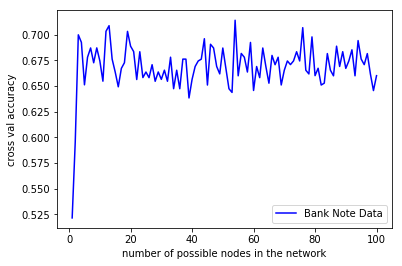

In [11]:
import matplotlib.pyplot as plt

figure()
plt.plot(n_range_CBD,n_scores_CBD,"b", label ="Bank Note Data")
plt.xlabel("number of possible nodes in the network")
plt.ylabel("cross val accuracy")
legend(loc = "best")
